#  Loan Eligibility Prediction Using Classification Mode

In [15]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Loading & Pre-processing

In [16]:
# Loading Dataset
data = pd.read_csv('loan_approval_dataset.csv')

In [17]:
# Viewing Top 5 Rows or Dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [18]:
# Check Data Contains NULL/NaN values
data.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
credit_score,0
residential_assets_value,0
commercial_assets_value,0


In [19]:
# Checking Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    credit_score              4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value           4269 non-null   int64 
 12  loan_status                4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Data Visualization

In [20]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' credit_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

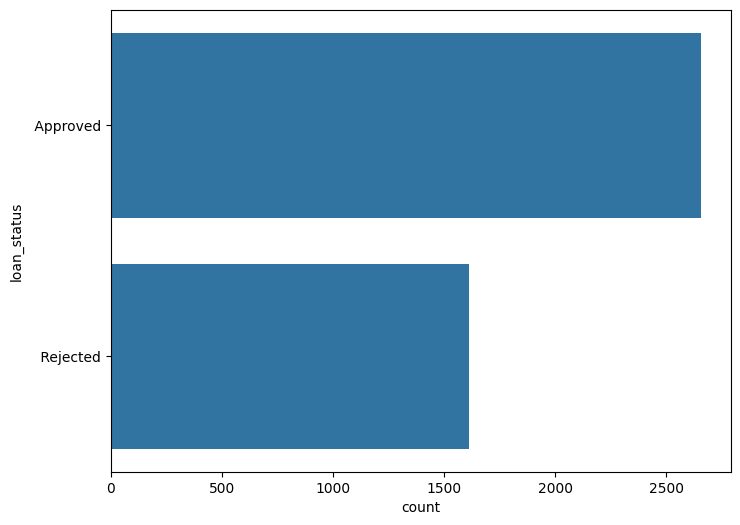

In [21]:
# bar plot for checking the distribution of target variable

plt.figure(figsize=(8, 6))
sns.countplot(data['loan_status'])
plt.show()

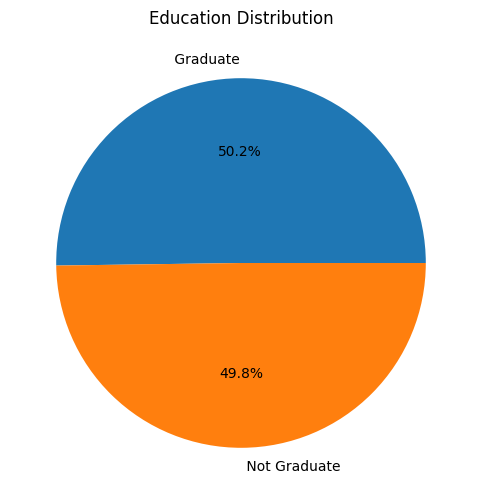

In [22]:
# pie chart for education

plt.figure(figsize=(8, 6))
data[' education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Distribution')
plt.ylabel('')
plt.show()

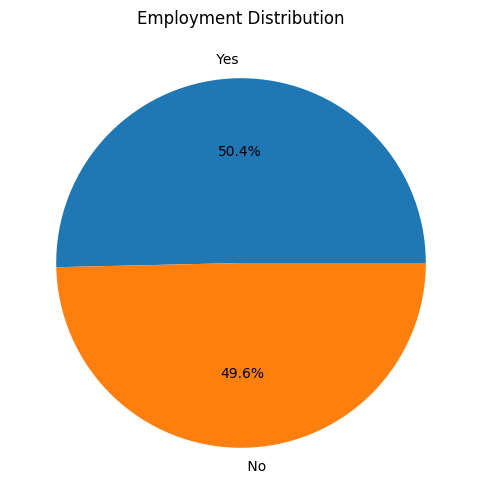

In [23]:
# pie chart for education

plt.figure(figsize=(8, 6))
data[' self_employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Employment Distribution')
plt.ylabel('')
plt.show()

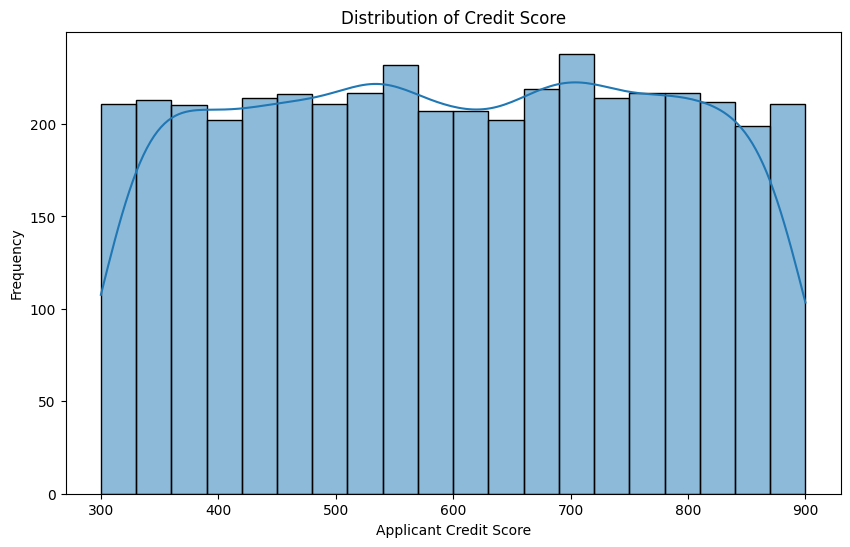

In [24]:
# Chart of Credit Score

plt.figure(figsize=(10, 6))
sns.histplot(data[' credit_score'], bins=20, kde=True)
plt.title('Distribution of Credit Score')
plt.xlabel('Applicant Credit Score')
plt.ylabel('Frequency')
plt.show()

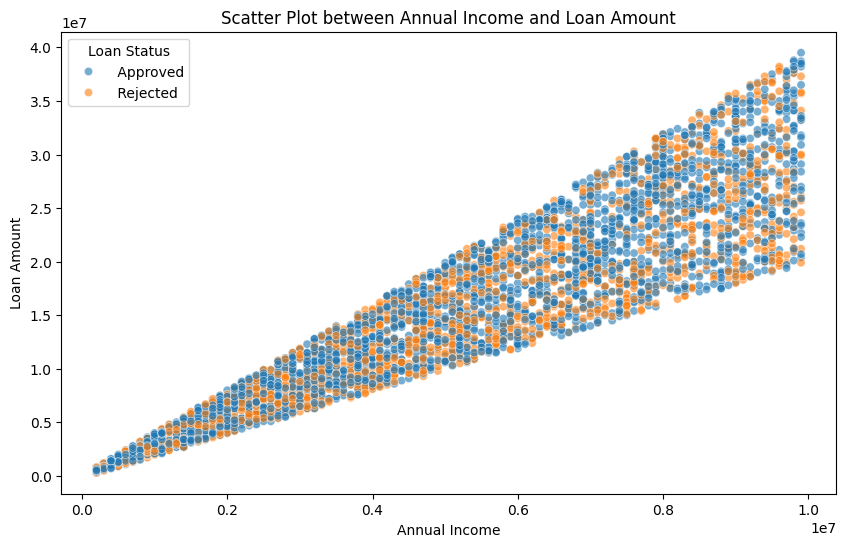

In [25]:
# catter Plot between Annual Income and Loan Amount

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=' income_annum', y=' loan_amount', hue='loan_status', alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.title("Scatter Plot between Annual Income and Loan Amount")
plt.legend(title="Loan Status")
plt.show()

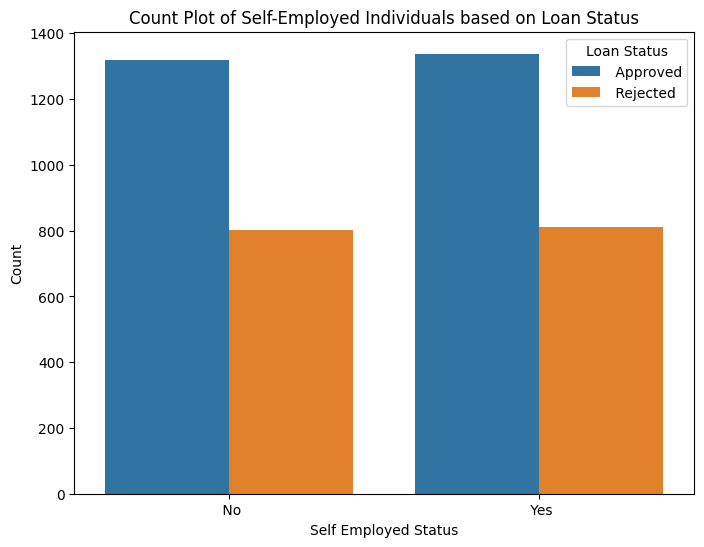

In [26]:
# Count Plot of Self-Employed Individuals based on Loan Status

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=' self_employed', hue='loan_status')
plt.xlabel("Self Employed Status")
plt.ylabel("Count")
plt.title("Count Plot of Self-Employed Individuals based on Loan Status")
plt.legend(title="Loan Status")
plt.show()

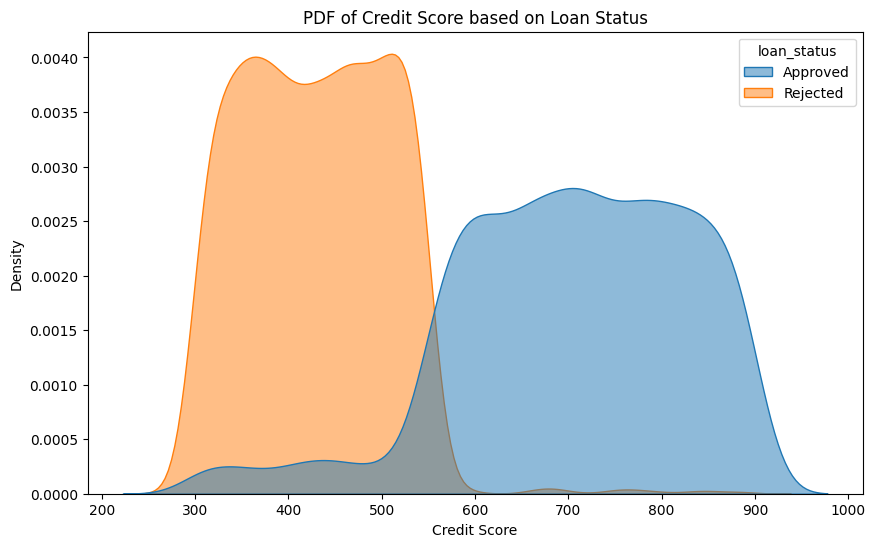

In [27]:
# PDF of Credit Score based on Loan Status

data['loan_status'] = data['loan_status'].str.strip()
data['loan_status'] = data['loan_status'].astype('category')

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x=' credit_score', hue='loan_status', fill=True, common_norm=False, alpha=0.5)
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.title("PDF of Credit Score based on Loan Status")
plt.show()

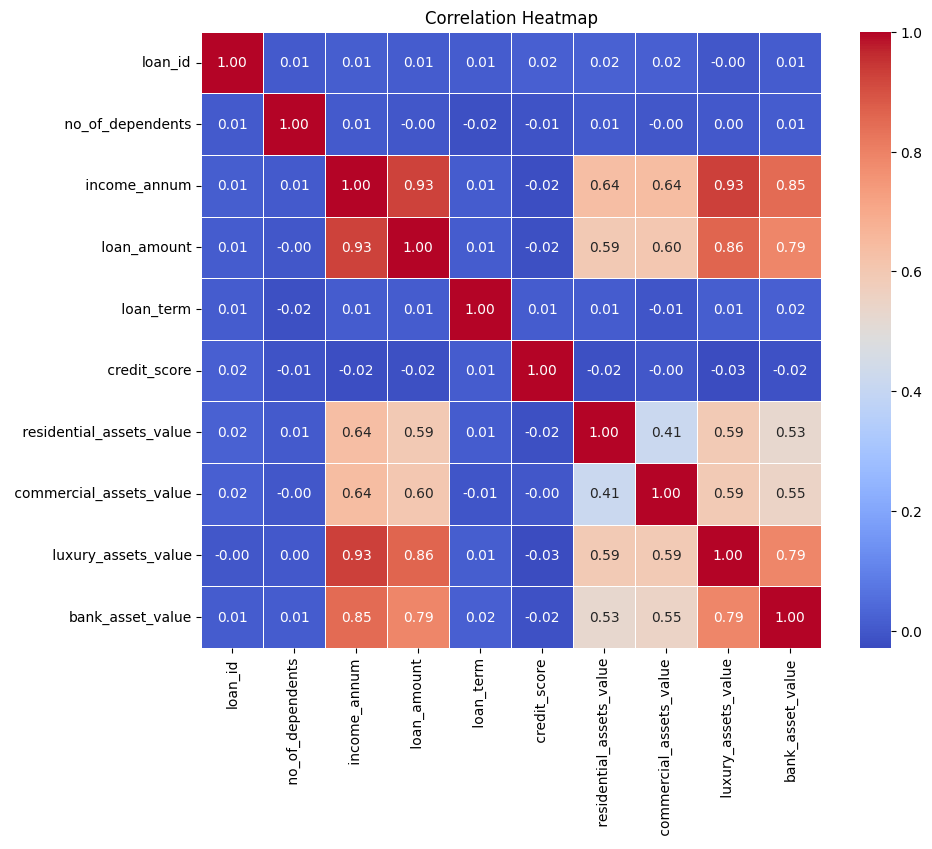

In [28]:
# Correlation Heatmap

numeric_data = data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Pre-processing

In [29]:
data.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
credit_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [31]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [32]:
x = data.drop('loan_status', axis=1)
y = data['loan_status']

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [34]:
# Balancing the dataset using SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 2656, 1: 1613})
After SMOTE: Counter({0: 2656, 1: 2656})


In [35]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Building

### Random Forest Model

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [38]:
param_grid = {'n_estimators': [50, 100, 200, 300, 500]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Predict on training data
y_train_pred = best_rf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy at Best Params: {train_accuracy:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'n_estimators': 300}
Train Accuracy at Best Params: 1.0000


In [39]:
best_rf = grid_search.best_estimator_

# Evaluate on test data
y_test_pred = best_rf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy at Best Params: {test_accuracy:.4f}")

Test Accuracy at Best Params: 0.9737


In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       502
           1       0.99      0.96      0.97       561

    accuracy                           0.97      1063
   macro avg       0.97      0.97      0.97      1063
weighted avg       0.97      0.97      0.97      1063



In [41]:
# Get predicted probabilities for the positive class (Approved)

y_test_probs = best_rf.predict_proba(x_test)[:, 1]

In [42]:
# Compute ROC curve and AUC score

fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

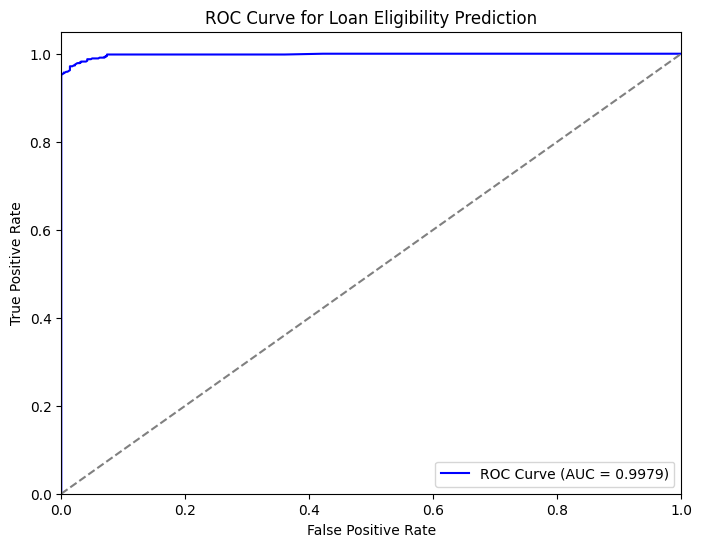

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Eligibility Prediction')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier

In [44]:
# Initialize the Gradient Boosting model

gb_model = GradientBoostingClassifier(random_state=42)

In [45]:
# Train the model

param_grid = {'n_estimators': [50, 100, 200, 300, 500]}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predict on training data
y_train_pred = best_gb.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy at Best Params: {train_accuracy:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'n_estimators': 500}
Train Accuracy at Best Params: 1.0000


In [46]:
best_gb = grid_search.best_estimator_

# Evaluate on test data
y_test_pred = best_gb.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy at Best Params: {test_accuracy:.4f}")

Test Accuracy at Best Params: 0.9821


In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       502
           1       1.00      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



In [48]:
# Get predicted probabilities for the positive class (Approved)

y_test_probs = best_gb.predict_proba(x_test)[:, 1]

In [49]:
# Compute ROC curve and AUC score

fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

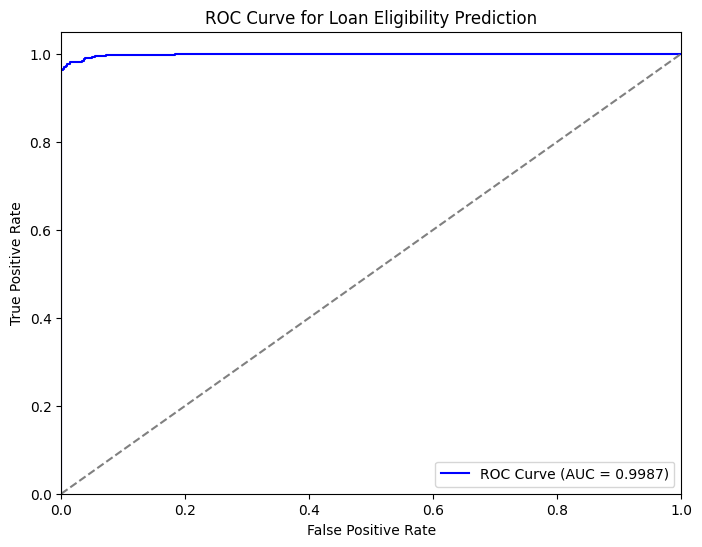

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Eligibility Prediction')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [52]:
# Normalizing the data

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [53]:
# Initialize the logistic Regression model

log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [54]:
# Train the model

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
best_lr = grid_search.best_estimator_

# Predict on training data
y_train_pred = best_lr.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy at Best Params: {train_accuracy:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 0.1}
Train Accuracy at Best Params: 0.9332


In [55]:
best_lr = grid_search.best_estimator_

# Evaluate on test data
y_test_pred = best_lr.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy at Best Params: {test_accuracy:.4f}")

Test Accuracy at Best Params: 0.9257


In [56]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       502
           1       0.92      0.94      0.93       561

    accuracy                           0.93      1063
   macro avg       0.93      0.92      0.93      1063
weighted avg       0.93      0.93      0.93      1063



In [57]:
# Get predicted probabilities for the positive class (Approved)

y_test_probs = best_lr.predict_proba(x_test_scaled)[:, 1]

In [58]:
# Compute ROC curve and AUC score

fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

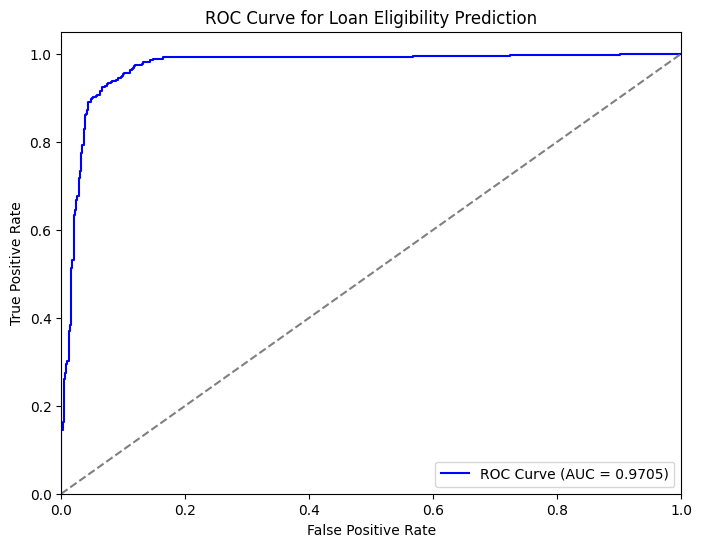

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Eligibility Prediction')
plt.legend(loc="lower right")
plt.show()

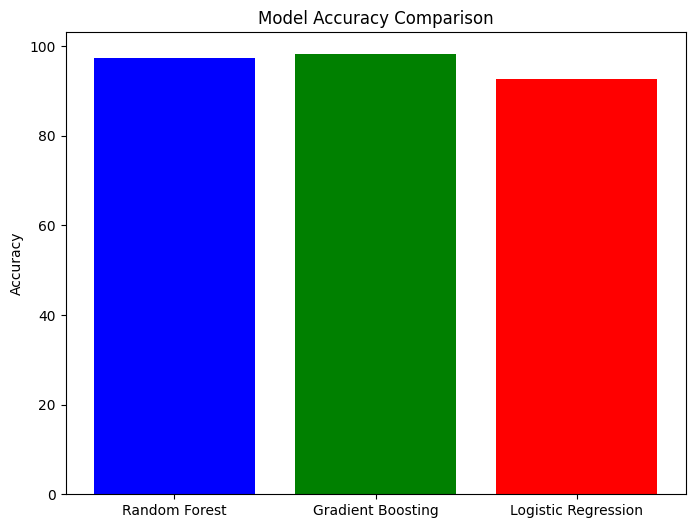

In [60]:
# Create a bar chart to compare model accuracy

model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [97.37, 98.21, 92.66]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()